In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

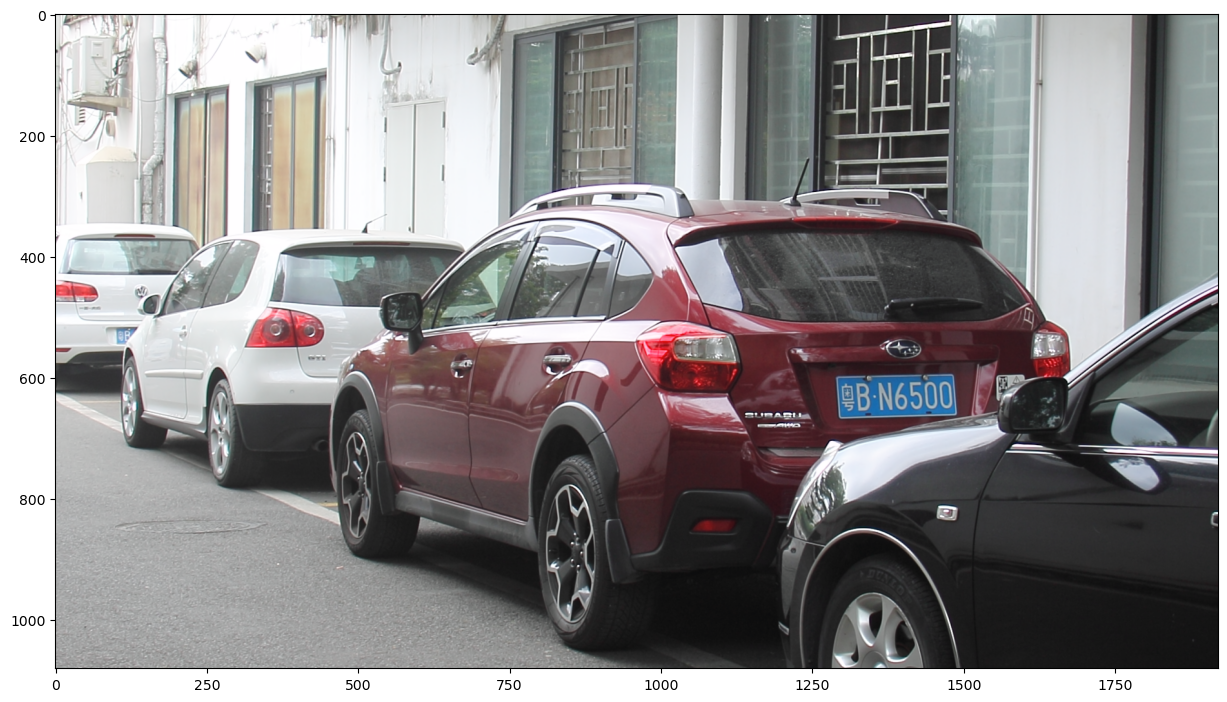

In [19]:
#Lectura de la imagen
img = cv.imread('G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/DPP0357.TIF')
if img is None:
    img = cv.imread('C:/Users/claudio.pacheco/Documents/Repositorio/DPP0357.TIF')
        
plt.imshow(img[:,:,::-1])

In [9]:
#Descomponer la imagen en sus canales RGB
B,G,R = cv.split(img)

In [10]:
#crear matriz de bayer
bayer_matrix = np.zeros_like(img)
bayer_matrix[::2, ::2, 2] = R[::2, ::2]
bayer_matrix[::2, 1::2, 1] = G[::2, 1::2]
bayer_matrix[1::2, ::2, 1] = G[1::2, ::2]
bayer_matrix[1::2, 1::2, 0] = B[1::2, 1::2]

In [11]:
bayer_matrix

array([[[  0,   0, 232],
        [  0, 235,   0],
        [  0,   0, 230],
        ...,
        [  0, 156,   0],
        [  0,   0, 141],
        [  0, 156,   0]],

       [[  0, 237,   0],
        [233,   0,   0],
        [  0, 233,   0],
        ...,
        [153,   0,   0],
        [  0, 155,   0],
        [153,   0,   0]],

       [[  0,   0, 233],
        [  0, 235,   0],
        [  0,   0, 230],
        ...,
        [  0, 155,   0],
        [  0,   0, 139],
        [  0, 155,   0]],

       ...,

       [[  0, 157,   0],
        [163,   0,   0],
        [  0, 174,   0],
        ...,
        [ 20,   0,   0],
        [  0,  19,   0],
        [ 19,   0,   0]],

       [[  0,   0, 168],
        [  0, 166,   0],
        [  0,   0, 165],
        ...,
        [  0,  20,   0],
        [  0,   0,  21],
        [  0,  21,   0]],

       [[  0, 169,   0],
        [165,   0,   0],
        [  0, 159,   0],
        ...,
        [ 19,   0,   0],
        [  0,  20,   0],
        [ 21,   0,   0]]

In [20]:
#Crear la función debayering(img) que reciba una imagen y devuelva la matriz de bayer
def debayering(img):
    height, width = img.shape[0],img.shape[1]
    B,G,R = cv.split(img)
    bayer = np.empty((height, width), np.uint8)
    bayer[0::2, 0::2] = G[0::2, 0::2] 
    bayer[0::2, 1::2] = R[0::2, 1::2] 
    bayer[1::2, 0::2] = B[1::2, 0::2] 
    bayer[1::2, 1::2] = G[1::2, 1::2]
    bayer = cv.cvtColor(bayer, cv.COLOR_GRAY2BGR)
    bayer[0::2, 0::2, 0::2] = 0  
    bayer[0::2, 1::2, 0:2] = 0   
    bayer[1::2, 0::2, 1:] = 0    
    bayer[1::2, 1::2, 0::2] = 0  

    return bayer

array([[[  0, 206,   0],
        [  0,   0, 205],
        [  0, 206,   0],
        ...,
        [  0,   0, 167],
        [  0, 178,   0],
        [  0,   0, 166]],

       [[209,   0,   0],
        [  0, 206,   0],
        [208,   0,   0],
        ...,
        [  0, 178,   0],
        [176,   0,   0],
        [  0, 178,   0]],

       [[  0, 206,   0],
        [  0,   0, 206],
        [  0, 205,   0],
        ...,
        [  0,   0, 168],
        [  0, 178,   0],
        [  0,   0, 169]],

       ...,

       [[ 51,   0,   0],
        [  0,  55,   0],
        [ 53,   0,   0],
        ...,
        [  0, 136,   0],
        [133,   0,   0],
        [  0, 137,   0]],

       [[  0,  59,   0],
        [  0,   0,  55],
        [  0,  64,   0],
        ...,
        [  0,   0, 132],
        [  0, 135,   0],
        [  0,   0, 132]],

       [[ 59,   0,   0],
        [  0,  69,   0],
        [ 66,   0,   0],
        ...,
        [  0, 133,   0],
        [129,   0,   0],
        [  0, 134,   0]]

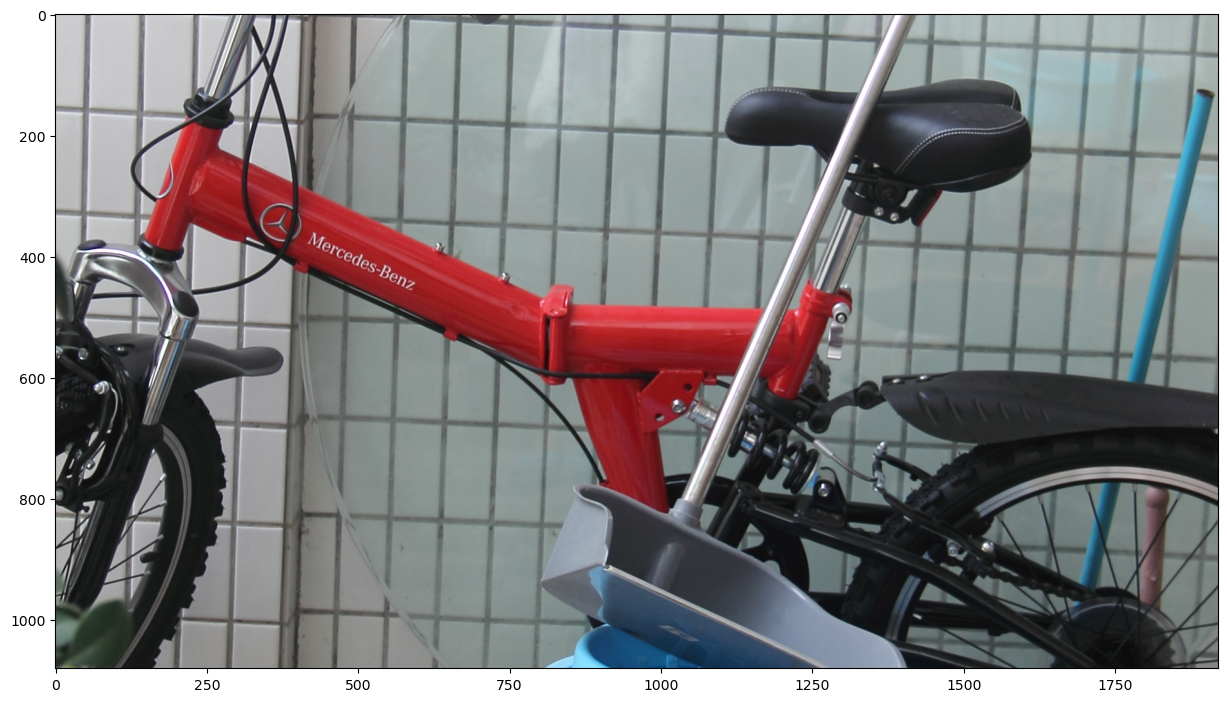

In [23]:
#Ejemplo de la función debayering con otra imagen
img2 = cv.imread('G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/DPP0012.TIF')
if img2 is None:
    img2 = cv.imread('C:/Users/claudio.pacheco/Documents/Repositorio/DPP0012.TIF')
plt.imshow(img2[:,:,::-1])
debayering(img2)